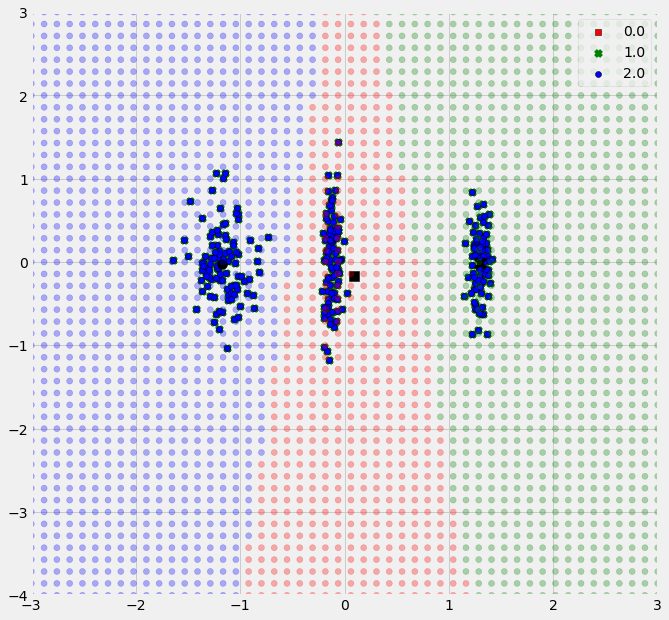

In [115]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import linalg
from sklearn.preprocessing import StandardScaler
from matplotlib import style
style.use('fivethirtyeight')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from matplotlib import colors
np.random.seed(1234567)
# simulate data 

X1=np.random.multivariate_normal([0.3,0.3],[[1,0],
        [0,0.01]],100)
X2=np.random.multivariate_normal([5,5],[[1.5,0],
        [0,0.1]],100)
X3=np.random.multivariate_normal([3,3],[[2,0],
        [0,0.01]],100)
y=np.zeros((300,1))
y[0:99,0]=1
y[100:199,0]=2
y[200:299,0]=3

x=np.column_stack((y,np.concatenate((X1,X2,X3), axis=0)))
df=pd.DataFrame(x)

X = df.iloc[:,1:].copy()
target = df.iloc[:,0].copy()


# Standardize the data
for col in X.columns:
    X[col] = StandardScaler().fit_transform(X[col].values.reshape(-1,1))



# Compute the mean vector mu and the mean vector per class mu_k
mu = np.mean(X,axis=0).values.reshape(2,1) # Mean vector mu 
mu_k = []

for i,orchid in enumerate(np.unique(df.iloc[:,0])):
    mu_k.append(np.mean(X.where(df.iloc[:,0]==orchid),axis=0))
mu_k = np.array(mu_k).T


# Compute the Scatter within and Scatter between matrices
data_SW = []
Nc = []
for i,orchid in enumerate(np.unique(df.iloc[:,0])):
    a = np.array(X.where(df.iloc[:,0]==orchid).dropna().values-mu_k[:,i].reshape(1,2))
    data_SW.append(np.dot(a.T,a))
    Nc.append(np.sum(df.iloc[:,0]==orchid))
SW = np.sum(data_SW,axis=0)

SB = np.dot(Nc*np.array(mu_k-mu),np.array(mu_k-mu).T)
   
# Compute the Eigenvalues and Eigenvectors of SW^-1 SB
eigval, eigvec = np.linalg.eig(np.dot(np.linalg.inv(SW),SB))


    
# Select the two largest eigenvalues 
eigen_pairs = [[np.abs(eigval[i]),eigvec[:,i]] for i in range(len(eigval))]
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0],reverse=True)
w = np.hstack((eigen_pairs[0][1][:,np.newaxis].real,eigen_pairs[1][1][:,np.newaxis].real)) # Select two largest


#  Transform the data with Y=X*w
Y = X.dot(w)

# Plot the data
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
ax0.set_xlim(-3,3)
ax0.set_ylim(-4,3)

for l,c,m in zip(np.unique(y),['r','g','b'],['s','x','o']):
    ax0.scatter(Y[0],
                Y[1],
               c=c, marker=m, label=l,edgecolors='black')
ax0.legend(loc='upper right')


# Plot the voroni spaces
means = []

for m,target in zip(['s','x','o'],np.unique(y)):
    means.append(np.mean(Y[y==target],axis=0))
    ax0.scatter(np.mean(Y[y==target],axis=0)[0],np.mean(Y[y==target],axis=0)[1],marker=m,c='black',s=100)
   
mesh_x, mesh_y = np.meshgrid(np.linspace(-3,3),np.linspace(-4,3)) 
mesh = []


for i in range(len(mesh_x)):
    for j in range(len(mesh_x[0])):
        date = [mesh_x[i][j],mesh_y[i][j]]
        mesh.append((mesh_x[i][j],mesh_y[i][j]))


NN = KNeighborsClassifier(n_neighbors=1)
NN.fit(means,['r','g',"b"])        
predictions = NN.predict(np.array(mesh))

ax0.scatter(np.array(mesh)[:,0],np.array(mesh)[:,1],color=predictions,alpha=0.3)


plt.show()

Text(0.5, 1.0, 'LDA')

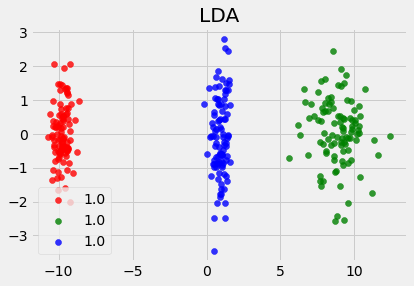

In [116]:
## use package to do LDA
x=np.column_stack((y,np.concatenate((X1,X2,X3), axis=0)))
df=pd.DataFrame(x)

X = df.iloc[:,1:].copy()
y = df.iloc[:,0].copy()
clf= LinearDiscriminantAnalysis(n_components=2)
X_r= clf.fit(X, y).transform(X)
colors = ['r', 'g', 'b']
target_names =df.iloc[:,0].astype('category')
lw = 2
plt.figure()
for color, i, target_name in zip(colors, [1, 2, 3], target_names):
    plt.scatter(X_r[y==i,0], X_r[y==i,1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA')



In [117]:
### code modifed based on https://scikit-learn.org/stable/auto_examples/classification/plot_lda_qda.html

# Plot functions
def plot_data(lda, X, y, y_pred, fig_index):
    splot = plt.subplot(1,2, fig_index)
    if fig_index == 1:
        plt.title('Linear Discriminant Analysis')
        plt.ylabel('Data with\n fixed covariance')
    elif fig_index == 2:
        plt.title('Quadratic Discriminant Analysis')
    
    tp = (y == y_pred)  # True Positive
    tp1, tp2, tp3 = tp[y == 1], tp[y == 2],tp[y == 3]
    X1, X2, X3 = X[y == 1], X[y == 2],X[y == 3]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]
    X2_tp, X2_fp = X2[tp2], X2[~tp2]
    X3_tp, X3_fp = X3[tp3], X3[~tp3]

    # class 1: dots
    plt.scatter(X1_tp[[1]], X1_tp[[2]], marker='.', color='red')
    plt.scatter(X1_fp[[1]], X1_fp[[2]], marker='x',
                s=20, color='#990000')  

    # class 2: dots
    plt.scatter(X2_tp[[1]], X2_tp[[2]], marker='.', color='blue')
    plt.scatter(X2_fp[[1]], X2_fp[[2]], marker='x',
                s=20, color='#000099')  

    # class 3: dots
    plt.scatter(X3_tp[[1]], X3_tp[[2]], marker='.', color='green')
    plt.scatter(X3_fp[[1]], X3_fp[[2]], marker='x',
                s=20, color='#009109')  

    # class: areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    #plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
    #               norm=colors.Normalize(0., 1.), zorder=0)
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

    # means
    plt.plot(lda.means_[0][0], lda.means_[0][1],
             '*', color='yellow', markersize=15, markeredgecolor='grey')
    plt.plot(lda.means_[1][0], lda.means_[1][1],
             '*', color='yellow', markersize=15, markeredgecolor='grey')
    plt.plot(lda.means_[2][0], lda.means_[2][1],
             '*', color='yellow', markersize=15, markeredgecolor='grey')
    return splot



def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, facecolor=color,
                              edgecolor='black', linewidth=2)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.2)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())



def plot_qda_cov(qda, splot):
    plot_ellipse(splot, qda.means_[0], qda.covariance_[0], 'red')
    plot_ellipse(splot, qda.means_[1], qda.covariance_[1], 'blue')
    plot_ellipse(splot, qda.means_[2], qda.covariance_[2], 'green')


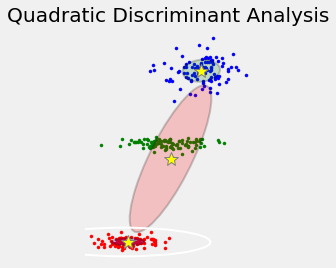

In [118]:
 # Quadratic Discriminant Analysis
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
y_pred = qda.fit(X, y).predict(X)
splot = plot_data(qda, X, y, y_pred,2)
plot_qda_cov(qda, splot)
plt.show()